# 1. Data Data Preparation

In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv('framingham.csv')


In [3]:
df.columns = df.columns.str.lower()


In [4]:
df.head().T


,0,1,2,3,4
male,1.00,0.00,1.00,0.00,0.0
age,39.00,46.00,48.00,61.00,46.0
education,4.00,2.00,1.00,3.00,3.0
currentsmoker,0.00,0.00,1.00,1.00,1.0
cigsperday,0.00,0.00,20.00,30.00,23.0
bpmeds,0.00,0.00,0.00,0.00,0.0
prevalentstroke,0.00,0.00,0.00,0.00,0.0
prevalenthyp,0.00,0.00,0.00,1.00,0.0
diabetes,0.00,0.00,0.00,0.00,0.0
totchol,195.00,250.00,245.00,225.00,285.0


In [5]:
df.dtypes


male                 int64
age                  int64
education          float64
currentsmoker        int64
cigsperday         float64
bpmeds             float64
prevalentstroke      int64
prevalenthyp         int64
diabetes             int64
totchol            float64
sysbp              float64
diabp              float64
bmi                float64
heartrate          float64
glucose            float64
tenyearchd           int64
dtype: object

In [6]:
df.nunique()

male                  2
age                  39
education             4
currentsmoker         2
cigsperday           33
bpmeds                2
prevalentstroke       2
prevalenthyp          2
diabetes              2
totchol             248
sysbp               234
diabp               146
bmi                1363
heartrate            73
glucose             143
tenyearchd            2
dtype: int64

In [7]:
df['male'] = df['male'].astype(str)
df['education'] = df['education'].astype(str)
df['currentsmoker'] = df['currentsmoker'].astype(str)
df['bpmeds'] = df['bpmeds'].astype(str)
df['prevalentstroke'] = df['prevalenthyp'].astype(str)
df['diabetes'] = df['diabetes'].astype(str)
df['prevalenthyp'] = df['prevalenthyp'].astype(str)

In [8]:
df.nunique()

male                  2
age                  39
education             5
currentsmoker         2
cigsperday           33
bpmeds                3
prevalentstroke       2
prevalenthyp          2
diabetes              2
totchol             248
sysbp               234
diabp               146
bmi                1363
heartrate            73
glucose             143
tenyearchd            2
dtype: int64

In [9]:
df.dtypes

male                object
age                  int64
education           object
currentsmoker       object
cigsperday         float64
bpmeds              object
prevalentstroke     object
prevalenthyp        object
diabetes            object
totchol            float64
sysbp              float64
diabp              float64
bmi                float64
heartrate          float64
glucose            float64
tenyearchd           int64
dtype: object

## 1.1 EDA for Missing Values

In [10]:
numerical = ['age', 'cigsperday', 'totchol', 'sysbp',
             'diabp', 'bmi', 'heartrate', 'glucose']


In [11]:
categorical = ['male', 'education', 'currentsmoker', 'bpmeds',
               'prevalentstroke', 'prevalenthyp', 'diabetes']


In [12]:
df[categorical].head()


,male,education,currentsmoker,bpmeds,prevalentstroke,prevalenthyp,diabetes
0,1,4.0,0,0.0,0,0,0
1,0,2.0,0,0.0,0,0,0
2,1,1.0,1,0.0,0,0,0
3,0,3.0,1,0.0,1,1,0
4,0,3.0,1,0.0,0,0,0


In [13]:
df[categorical].isnull().sum()


male               0
education          0
currentsmoker      0
bpmeds             0
prevalentstroke    0
prevalenthyp       0
diabetes           0
dtype: int64

In [14]:
df.education = df.education.fillna(0)


In [15]:
df.bpmeds = df.bpmeds.fillna(0)


In [16]:
df[categorical].isnull().sum()


male               0
education          0
currentsmoker      0
bpmeds             0
prevalentstroke    0
prevalenthyp       0
diabetes           0
dtype: int64

In [17]:
df[numerical].isnull().sum()


age             0
cigsperday     29
totchol        50
sysbp           0
diabp           0
bmi            19
heartrate       1
glucose       388
dtype: int64

In [18]:
df.cigsperday = df.cigsperday.fillna(df.cigsperday.mean())


In [19]:
df.heartrate = df.heartrate.fillna(df.heartrate.mean())


categorical variable filled with 0, numerical varible filled mean values.

In [20]:
df.glucose = df.glucose.fillna(df.glucose.mean())


In [21]:
df.totchol = df.totchol.fillna(df.totchol.mean())


In [22]:
df.bmi = df.bmi.fillna(df.bmi.mean())


In [23]:
df.isnull().sum()


male               0
age                0
education          0
currentsmoker      0
cigsperday         0
bpmeds             0
prevalentstroke    0
prevalenthyp       0
diabetes           0
totchol            0
sysbp              0
diabp              0
bmi                0
heartrate          0
glucose            0
tenyearchd         0
dtype: int64

In [24]:
df.head()

,male,age,education,currentsmoker,cigsperday,bpmeds,prevalentstroke,prevalenthyp,diabetes,totchol,sysbp,diabp,bmi,heartrate,glucose,tenyearchd
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,1,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [25]:
df.columns

Index(['male', 'age', 'education', 'currentsmoker', 'cigsperday', 'bpmeds',
       'prevalentstroke', 'prevalenthyp', 'diabetes', 'totchol', 'sysbp',
       'diabp', 'bmi', 'heartrate', 'glucose', 'tenyearchd'],
      dtype='object')

In [26]:
df[numerical].head()


,age,cigsperday,totchol,sysbp,diabp,bmi,heartrate,glucose
0,39,0.0,195.0,106.0,70.0,26.97,80.0,77.0
1,46,0.0,250.0,121.0,81.0,28.73,95.0,76.0
2,48,20.0,245.0,127.5,80.0,25.34,75.0,70.0
3,61,30.0,225.0,150.0,95.0,28.58,65.0,103.0
4,46,23.0,285.0,130.0,84.0,23.10,85.0,85.0


## 1.2 The Validation Frame

In [27]:
from sklearn.model_selection import train_test_split


In [28]:


df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)
len(df_train), len(df_val), len(df_test)
#df_test.to_csv('test.csv', index=False)
#df_test.to_parquet('output.parquet', index=False)
#df_train.to_parquet('train.parquet', index=False)

(2542, 848, 848)

In [29]:
df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

In [30]:
y_train = df_train.tenyearchd.values
y_val = df_val.tenyearchd.values
y_test = df_test.tenyearchd.values



In [31]:
del df_train['tenyearchd']
del df_val['tenyearchd']
del df_test['tenyearchd']



# 2. Exploratory Data Analysis

## 2.1 Exploratory Data Analysis For Numeric Variables

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


<AxesSubplot:title={'center':'cigsperday'}, xlabel='tenyearchd'>

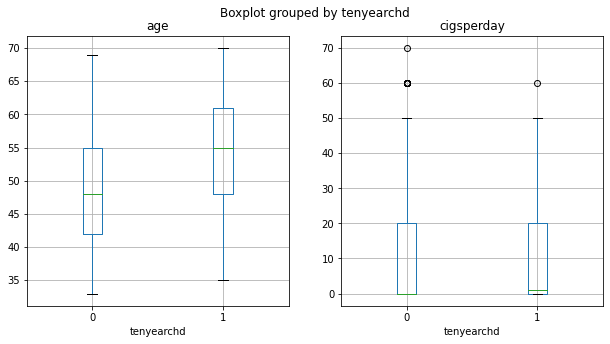

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
df_full_train.boxplot('age', 'tenyearchd', ax=ax[0])
df_full_train.boxplot('cigsperday', 'tenyearchd', ax=ax[1])


Seems like people who 10 year risk of coronary heart disease slightly older than other class.
For both class distribution of number of cigarettes that the person smoked on average in one day is  right skewed distribution.

<AxesSubplot:title={'center':'sysbp'}, xlabel='tenyearchd'>

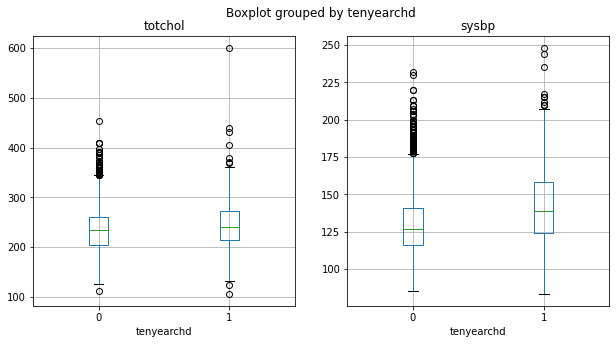

In [34]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
df_full_train.boxplot('totchol', 'tenyearchd', ax=ax[0])
df_full_train.boxplot('sysbp', 'tenyearchd', ax=ax[1])


Mean of **total cholesterol** level approximately 220-240 for both class and there is few outlier.
Men of **Systolic blood pressure** for class 1 more than class 0. People who 10 year risk of CHD higher systolic blood pressure.

<AxesSubplot:title={'center':'bmi'}, xlabel='tenyearchd'>

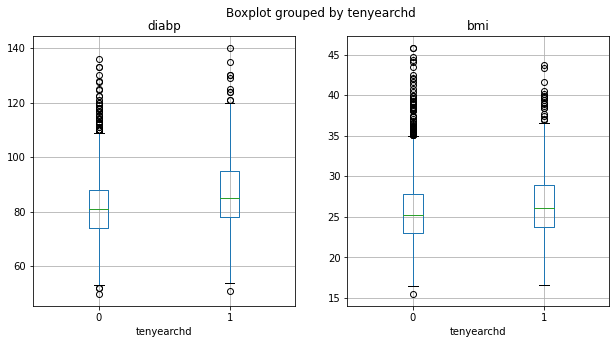

In [35]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
df_full_train.boxplot('diabp', 'tenyearchd', ax=ax[0])
df_full_train.boxplot('bmi', 'tenyearchd', ax=ax[1])


Mean of **diastolic blood pressure** 81 for class 0, 85 for class 1. People who 10 year risk of CHD higher diastolic blood pressure.But considering outlier of class 0 diastolic blood pressure is not enough the explanation risk of CHD.



<AxesSubplot:title={'center':'glucose'}, xlabel='tenyearchd'>

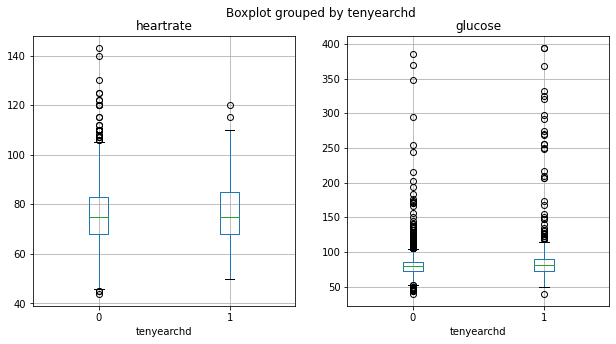

In [36]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
df_full_train.boxplot('heartrate', 'tenyearchd', ax=ax[0])
df_full_train.boxplot('glucose', 'tenyearchd', ax=ax[1])


High **heart rate** doesn't cause ten year risk of CHD. But statistically has to be test. **Glucose level** contains many outlier observations for both class. It is not the only decisive factor.

## 2.2 Exploratory Data Analysis For Categorical Variable

In [37]:
df_full_train[categorical].head()


,male,education,currentsmoker,bpmeds,prevalentstroke,prevalenthyp,diabetes
3873,1,nan,0,0.0,0,0,0
781,1,3.0,1,0.0,0,0,0
703,0,3.0,0,0.0,0,0,0
2675,1,2.0,1,0.0,0,0,0
394,0,2.0,0,0.0,1,1,0


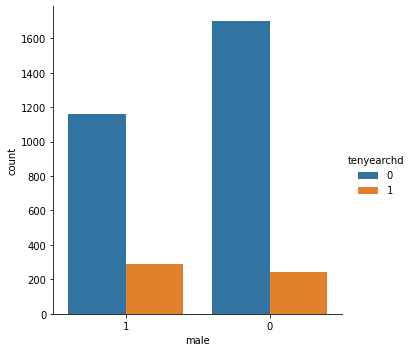

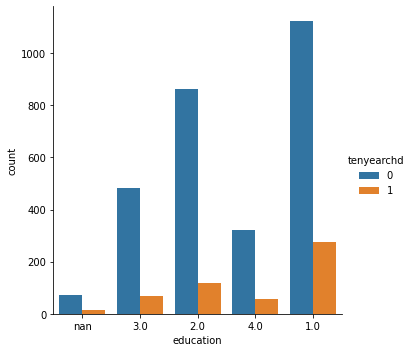

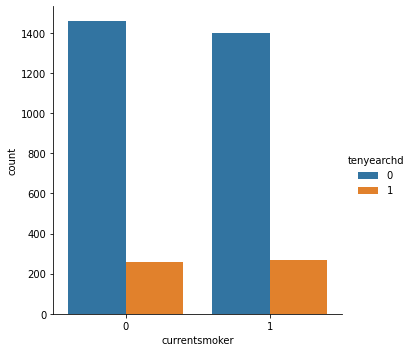

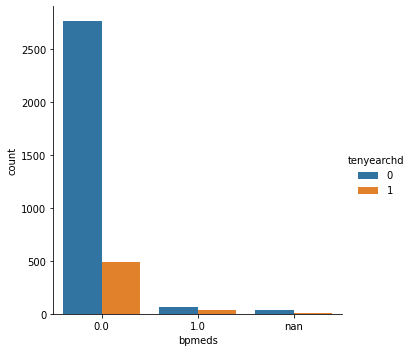

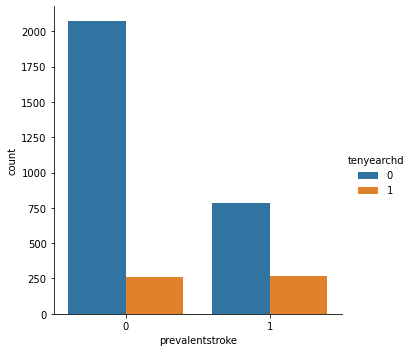

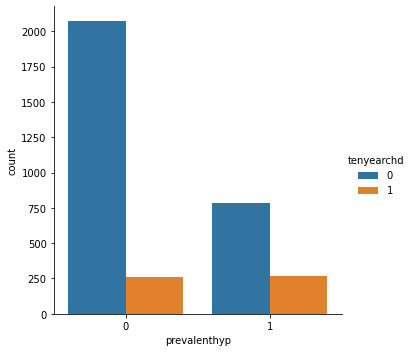

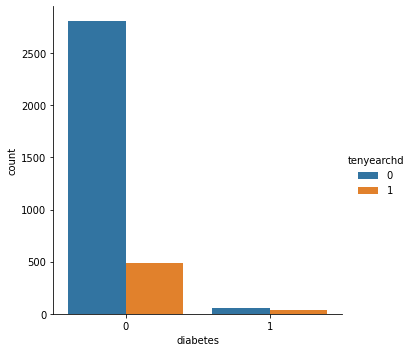

In [38]:
for cat in categorical:

    sns.catplot(data=df_full_train, kind='count', x=cat, hue='tenyearchd')


Look like prevalent hypertension is an important variable. Interesting in here current smokers not considering as an important variable.

## 3.3) Exploratory Data Analysis For Correlated Data

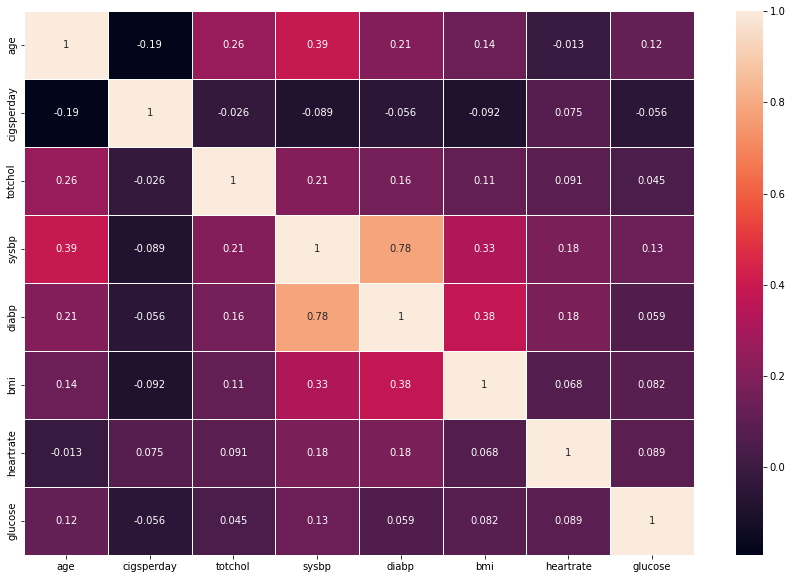

In [39]:
plt.figure(figsize=(15,10))  
sns.heatmap(df[numerical].corr(),annot=True,linewidths=.5)
plt.show()

Systolic blood and diastolic blood pressure is highly correlated.

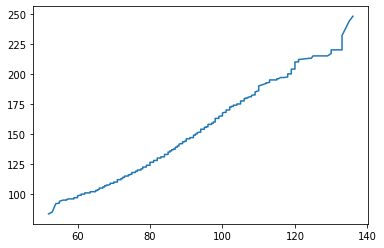

In [40]:
x = df_train.diabp.sort_values()
y = df_train.sysbp.sort_values()
plt.plot(x,y)

# MLflow Setup

In [41]:
import mlflow

In [42]:
from sklearn.feature_extraction import DictVectorizer

from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from hyperopt.pyll import scope



In [43]:
scope.int(hp.quniform('max_depth', 1, 2000, 1))

In [44]:
mlflow.set_tracking_uri("http://127.0.0.1:5000")
mlflow.set_experiment("mlops-project")

2022/08/11 19:27:14 INFO mlflow.tracking.fluent: Experiment with name 'mlops-project' does not exist. Creating a new experiment.


<Experiment: artifact_location='services/prediction_service/mlruns/1', experiment_id='1', lifecycle_stage='active', name='mlops-project', tags={}>

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score

In [47]:
from sklearn.pipeline import make_pipeline

In [48]:
train_dicts = df_train.to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)


val_dicts = df_val.to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_val = dv.fit_transform(val_dicts)


In [49]:
space = {'criterion' : hp.choice('criterion', ['entropy','gini']),
         'max_depth': scope.int(hp.quniform('max_depth', 1, 2000, 1)),
         'max_features' : hp.choice('max_features',['auto','sqrt','log2',None]),
         'min_samples_leaf' : hp.uniform('min_samples_leaf',0,0.5),
         'min_samples_split' : hp.uniform('min_samples_split',0,1),
         'n_estimators': scope.int(hp.quniform('n_estimators', 1, 2000, 1)),
         'max_leaf_nodes': scope.int(hp.quniform('max_leaf_nodes', 2, 1000,1)),
         'class_weight': hp.choice('class_weight', ['balanced', 'balanced_subsample', None]),
         'ccp_alpha': hp.uniform('ccp_alpha', 0,1)
    
}

In [50]:
def objective(space):
    with mlflow.start_run():
        mlflow.set_tag("mlops", "model1")
        pipeline = make_pipeline(DictVectorizer(sparse=False), RandomForestClassifier(criterion= space['criterion'],
                                        max_depth = space['max_depth'],
                                        max_features = space['max_features'],
                                        min_samples_leaf = space['min_samples_leaf'],
                                        min_samples_split = space['min_samples_split'],
                                        n_estimators = space['n_estimators'],
                                        max_leaf_nodes = space['max_leaf_nodes'],
                                        n_jobs= -1))
        mlflow.log_params(space)
        pipeline.fit(train_dicts, y_train)
        y_pred_val = pipeline.predict_proba(val_dicts)[:,1]
        auc =roc_auc_score(y_val, y_pred_val)
        acc = accuracy_score(y_val, y_pred_val >= 0.55)
        f1 = f1_score(y_val, y_pred_val>=0.5, average = 'weighted')
        metrics = {"accuracy_score": acc , "auc" : auc, "f1":f1}
        mlflow.log_metrics(metrics)
        mlflow.sklearn.log_model(pipeline, artifact_path="model")
    return {'loss' : auc, 'status' : STATUS_OK}



In [51]:
rstate = np.random.default_rng(2)
params = fmin(fn = objective,
            space=space,
            algo= tpe.suggest,
            max_evals=100,
            rstate=rstate,
            trials = Trials()
           )

        

  1%|          | 1/100 [00:10<17:52, 10.83s/trial, best loss: 0.6912602340115196]

/home/yusuf/.local/share/virtualenvs/mlops-project-6A3P8l_K/lib/python3.9/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")



100%|██████████| 100/100 [12:15<00:00,  7.35s/trial, best loss: 0.5]             


# Model 2

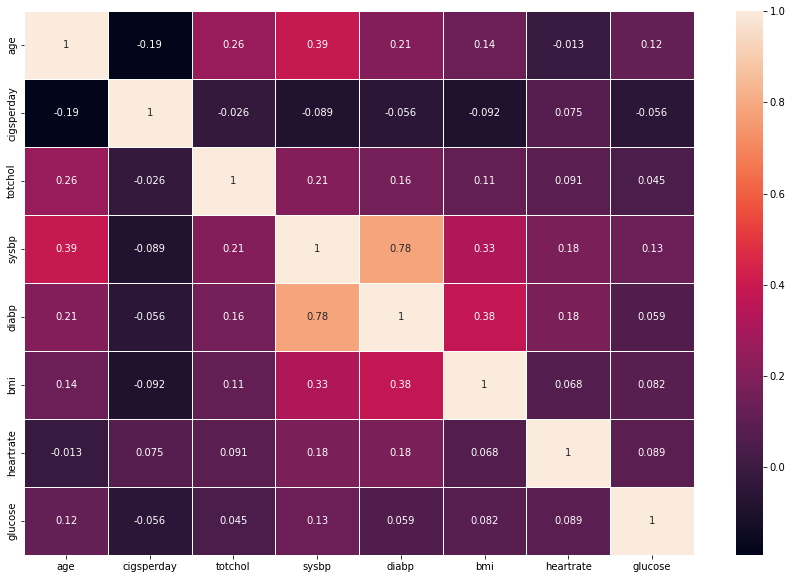

In [52]:
plt.figure(figsize=(15,10))  
sns.heatmap(df[numerical].corr(),annot=True,linewidths=.5)
plt.show()

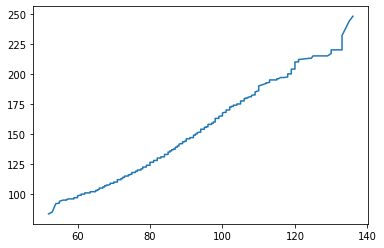

In [53]:
x = df_train.diabp.sort_values()
y = df_train.sysbp.sort_values()
plt.plot(x,y)

In [54]:
df_train_model = df_train
df_val_model = df_val
df_test_model = df_test

In [55]:
del df_train_model['diabp']
del df_val_model['diabp']
del df_test_model['diabp']

In [56]:
train_dicts = df_train_model.to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)


val_dicts = df_val_model.to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_val = dv.fit_transform(val_dicts)

In [57]:
space = {'criterion' : hp.choice('criterion', ['entropy','gini']),
         'max_depth': scope.int(hp.quniform('max_depth', 1, 2000, 1)),
         'max_features' : hp.choice('max_features',['auto','sqrt','log2',None]),
         'min_samples_leaf' : hp.uniform('min_samples_leaf',0,0.5),
         'min_samples_split' : hp.uniform('min_samples_split',0,1),
         'n_estimators': scope.int(hp.quniform('n_estimators', 1, 2000, 1)),
         'max_leaf_nodes': scope.int(hp.quniform('max_leaf_nodes', 2, 1000,1)),
         'class_weight': hp.choice('class_weight', ['balanced', 'balanced_subsample', None]),
         'ccp_alpha': hp.uniform('ccp_alpha', 0,1)
    
}

In [58]:
def objective(space):
    with mlflow.start_run():
        mlflow.set_tag("mlops", "model2")
        pipeline = make_pipeline(DictVectorizer(sparse=False), RandomForestClassifier(criterion= space['criterion'],
                                        max_depth = space['max_depth'],
                                        max_features = space['max_features'],
                                        min_samples_leaf = space['min_samples_leaf'],
                                        min_samples_split = space['min_samples_split'],
                                        n_estimators = space['n_estimators'],
                                        max_leaf_nodes = space['max_leaf_nodes'],
                                        n_jobs= -1))
        mlflow.log_params(space)
        pipeline.fit(train_dicts, y_train)
        y_pred_val = pipeline.predict_proba(val_dicts)[:,1]
        auc =roc_auc_score(y_val, y_pred_val)
        acc = accuracy_score(y_val, y_pred_val >= 0.55)
        f1 = f1_score(y_val, y_pred_val>=0.5, average = 'weighted')
        metrics = {"accuracy_score": acc , "auc" : auc, "f1":f1}
        mlflow.log_metrics(metrics)
        mlflow.sklearn.log_model(pipeline, artifact_path="model")
    return {'loss' : auc, 'status' : STATUS_OK}


In [59]:
rstate = np.random.default_rng(2)
params = fmin(fn = objective,
            space=space,
            algo= tpe.suggest,
            max_evals=100,
            rstate=rstate,
            trials = Trials()
           )


100%|██████████| 100/100 [18:37<00:00, 11.17s/trial, best loss: 0.5]                 


# Mlflow model Register

In [60]:
from mlflow.tracking import MlflowClient
client = MlflowClient(tracking_uri="http://127.0.0.1:5000")
client.list_experiments()



[<Experiment: artifact_location='services/prediction_service/mlruns/0', experiment_id='0', lifecycle_stage='active', name='Default', tags={}>,
 <Experiment: artifact_location='services/prediction_service/mlruns/1', experiment_id='1', lifecycle_stage='active', name='mlops-project', tags={}>]

In [61]:
from mlflow.entities import ViewType

runs = client.search_runs(
    experiment_ids='1',
    run_view_type=ViewType.ACTIVE_ONLY,
    max_results=5,
    order_by=["metrics.auc DESC"])

In [62]:
for run in runs:
    print(
        f"run id: {run.info.run_id}, accuracy_score: {run.data.metrics['accuracy_score']:.4f}, auc_score: {run.data.metrics['auc']:.4f}")

run id: 285dda4dcdca4cccbac6e8a1f4959e33, accuracy_score: 0.8455, auc_score: 0.7209
run id: f9aa5f6091b748528a9f62f71739a88a, accuracy_score: 0.8455, auc_score: 0.7199
run id: a8dd081d4f9448e7be77afcd9421325e, accuracy_score: 0.8455, auc_score: 0.7162
run id: 7710353d6ad14975afcff08f88bfb567, accuracy_score: 0.8455, auc_score: 0.7146
run id: de54df1850764254b1c2d5ae2b5afd8b, accuracy_score: 0.8455, auc_score: 0.7139


In [63]:

best = client.search_runs(
    experiment_ids='1',
    run_view_type=ViewType.ACTIVE_ONLY,
    max_results=1,
    order_by=["metrics.auc DESC"])[0]

In [64]:
best.info.run_id

'285dda4dcdca4cccbac6e8a1f4959e33'

In [65]:
best_model = best.info.run_id

In [66]:
mlflow.register_model(
    model_uri=f"runs:/{best_model}/model",
    name = "CHD_risk_model"
)

Successfully registered model 'CHD_risk_model'.
2022/08/11 19:58:11 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: CHD_risk_model, version 1
Created version '1' of model 'CHD_risk_model'.


<ModelVersion: creation_timestamp=1660237091574, current_stage='None', description='', last_updated_timestamp=1660237091574, name='CHD_risk_model', run_id='285dda4dcdca4cccbac6e8a1f4959e33', run_link='', source='services/prediction_service/mlruns/1/285dda4dcdca4cccbac6e8a1f4959e33/artifacts/model', status='READY', status_message='', tags={}, user_id='', version='1'>

# Notebook Test:

In [67]:
import pickle
import pandas as pd
import numpy as np
from sklearn.feature_extraction import DictVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


In [68]:
#df = pd.read_csv('framingham.csv')
#df.columns = df.columns.str.lower()
#df['male'] = df['male'].astype(str)
#df['education'] = df['education'].astype(str)
#df['currentsmoker'] = df['currentsmoker'].astype(str)
#df['bpmeds'] = df['bpmeds'].astype(str)
#df['prevalentstroke'] = df['prevalenthyp'].astype(str)
#df['diabetes'] = df['diabetes'].astype(str)
#df['prevalenthyp'] = df['prevalenthyp'].astype(str)

#numerical = ['age', 'cigsperday', 'totchol', 'sysbp',
             #'diabp', 'bmi', 'heartrate', 'glucose']


#categorical = ['male', 'education', 'currentsmoker', 'bpmeds',
               #'prevalentstroke', 'prevalenthyp', 'diabetes']

#df.cigsperday = df.cigsperday.fillna(df.cigsperday.mean())
#df.heartrate = df.heartrate.fillna(df.heartrate.mean())
#df.glucose = df.glucose.fillna(df.glucose.mean())
#df.totchol = df.totchol.fillna(df.totchol.mean())
#df.bmi = df.bmi.fillna(df.bmi.mean())


#df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
#df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)
#len(df_train), len(df_val), len(df_test)


#df_train = df_train.reset_index(drop = True)
#df_val = df_val.reset_index(drop = True)
#df_test = df_test.reset_index(drop = True)

#y_train = df_train.tenyearchd.values
#y_val = df_val.tenyearchd.values
#y_test = df_test.tenyearchd.values


#del df_train['tenyearchd']
#del df_val['tenyearchd']
#del df_test['tenyearchd']




In [69]:
#train_dicts = df_train.to_dict(orient = 'records')
#dv = DictVectorizer(sparse=False)
#X_train = dv.fit_transform(train_dicts)
#X_train.shape

(2542, 26)

In [70]:
#rf = RandomForestClassifier(            criterion = "gini",
                                        #max_depth = 1983,
                                        #max_features = None,
                                        #min_samples_leaf = 0.26498195795743534,
                                        #min_samples_split = 0.033261893714441826,
                                        #n_estimators = 1455,
                                        #max_leaf_nodes =172)
#rf.fit(X_train, y_train)
#print(X_train.shape)

(2542, 26)


In [80]:
#test= {'male': '0',
 #'age': 54,
 #'education': '1.0',
 #'currentsmoker': '0',
 #'cigsperday': 0.0,
 #'bpmeds': '0.0',
 #'prevalentstroke': '1',
 #'prevalenthyp': '1',
 #'diabetes': '0',
 #'totchol': 315.0,
 #'sysbp': 176.0,
 #'bmi': 29.23,
 #'heartrate': 82.0,
 #'glucose': 72.0}


In [81]:
#x = dv.transform(test)
#print(x.shape)
#rf.predict_proba(x)[0,1]

(1, 26)


0.22524137403805472

In [82]:
import mlflow
import mlflow.sklearn

In [83]:
#logged_model = f"./services/prediction_service/mlruns/1/{best_model}/artifacts/model"
#model = mlflow.sklearn.load_model(logged_model)

In [84]:
#print(model)
#model.predict_proba(test)

Pipeline(steps=[('dictvectorizer', DictVectorizer(sparse=False)),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=1438, max_features=None,
                                        max_leaf_nodes=666,
                                        min_samples_leaf=0.25725410522093756,
                                        min_samples_split=0.13910089889810784,
                                        n_estimators=1513, n_jobs=-1))])


array([[0.77426462, 0.22573538]])

In [85]:
#model.predict_proba(test)[0,1]

0.2257353778450682